In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 17.0 MB/s eta 0:00:00


In [3]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!kaggle datasets download -d nadinpethiyagoda/vehicle-dataset-for-yolo
!unzip /content/vehicle-dataset-for-yolo.zip

Streaming output truncated to the last 5000 lines.
  inflating: vehicle dataset/train/images/car12.jpg  
  inflating: vehicle dataset/train/images/car120.jpg  
  inflating: vehicle dataset/train/images/car121.jpg  
  inflating: vehicle dataset/train/images/car122.jpg  
  inflating: vehicle dataset/train/images/car123.jpg  
  inflating: vehicle dataset/train/images/car124.jpg  
  inflating: vehicle dataset/train/images/car125.jpg  
  inflating: vehicle dataset/train/images/car127.jpg  
  inflating: vehicle dataset/train/images/car128.jpg  
  inflating: vehicle dataset/train/images/car130.jpg  
  inflating: vehicle dataset/train/images/car132.jpg  
  inflating: vehicle dataset/train/images/car133.jpg  
  inflating: vehicle dataset/train/images/car138.jpg  
  inflating: vehicle dataset/train/images/car139.jpg  
  inflating: vehicle dataset/train/images/car14.jpg  
  inflating: vehicle dataset/train/images/car141.jpg  
  inflating: vehicle dataset/train/images/car142.jpg  
  inflating: veh

In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
model = YOLO()
# model = YOLO('yolov8n.pt') # load pretrained model

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


In [18]:
# Open the 'data.yaml' file
with open('/content/vehicle dataset/data.yaml', 'r') as f:
    # Read the content of the file
    content = f.read()

# Print the content for inspection
print(content)

train: /content/vehicle dataset/train/images
val: /content/vehicle dataset/valid/images

# Classes
nc: 6  # number of classes
names: ['car','threewheel', 'bus', 'truck', 'motorbike', 'van'] # class names


In [17]:
model.train(data = "/content/vehicle dataset/data.yaml", epochs =50)
# Replace "/content/vehicle dataset/train/images" with the path to your data.yaml file

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/vehicle dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

train: Scanning /content/vehicle dataset/train/labels.cache... 2100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2100/2100 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/vehicle dataset/valid/labels.cache... 900 images, 0 backgrounds, 0 corrupt: 100%|██████████| 900/900 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/vehicle dataset/valid/images/car55.jpg: corrupt JPEG restored and saved


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train9
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.56G     0.6482      2.477      1.167         12        640: 100%|██████████| 132/132 [00:58<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:12<00:00,  2.23it/s]


                   all        900       1150      0.787      0.733      0.823      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.48G     0.6914      1.478      1.174         12        640: 100%|██████████| 132/132 [00:51<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.61it/s]


                   all        900       1150      0.802       0.74       0.83      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.49G     0.7016      1.328      1.176         10        640: 100%|██████████| 132/132 [00:51<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.92it/s]


                   all        900       1150       0.72      0.639      0.722      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.48G     0.7112       1.23       1.18         17        640: 100%|██████████| 132/132 [00:47<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.72it/s]


                   all        900       1150        0.8      0.777      0.852      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.48G     0.6884      1.094      1.165         16        640: 100%|██████████| 132/132 [00:49<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.77it/s]


                   all        900       1150      0.557      0.656      0.665      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.49G     0.6898      1.022      1.161         17        640: 100%|██████████| 132/132 [00:49<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.52it/s]


                   all        900       1150      0.812      0.779      0.875      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.49G     0.6571     0.9341      1.146         18        640: 100%|██████████| 132/132 [00:49<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.22it/s]


                   all        900       1150      0.694      0.729       0.82      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.47G     0.6489     0.8951      1.132         16        640: 100%|██████████| 132/132 [00:51<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.33it/s]


                   all        900       1150      0.873      0.802      0.895       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.5G     0.6346     0.8213      1.126         11        640: 100%|██████████| 132/132 [00:48<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.69it/s]

                   all        900       1150      0.882      0.829      0.923      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.47G     0.6224     0.7802      1.122          9        640: 100%|██████████| 132/132 [00:49<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.40it/s]

                   all        900       1150      0.829      0.746      0.875      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.5G     0.6018     0.7562      1.106         10        640: 100%|██████████| 132/132 [00:49<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.12it/s]

                   all        900       1150      0.821      0.816      0.912      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.47G     0.5755     0.7339      1.092         14        640: 100%|██████████| 132/132 [00:48<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.63it/s]

                   all        900       1150      0.879      0.836      0.935      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.49G      0.572     0.6876      1.087          8        640: 100%|██████████| 132/132 [00:50<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.91it/s]

                   all        900       1150      0.871      0.819      0.926      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.47G     0.5694     0.6795      1.079         10        640: 100%|██████████| 132/132 [00:50<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.66it/s]

                   all        900       1150      0.944      0.861      0.948      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.49G      0.548     0.6616      1.079         12        640: 100%|██████████| 132/132 [00:49<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.66it/s]

                   all        900       1150      0.943      0.874      0.947      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.47G     0.5496     0.6307      1.071         14        640: 100%|██████████| 132/132 [00:48<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.85it/s]


                   all        900       1150      0.932      0.852      0.945      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       2.5G     0.5527     0.6302      1.075         14        640: 100%|██████████| 132/132 [00:48<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.94it/s]

                   all        900       1150       0.96      0.887      0.958      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.47G     0.5267     0.6009      1.065         19        640: 100%|██████████| 132/132 [00:49<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.55it/s]

                   all        900       1150      0.962      0.894      0.967      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.47G     0.5118     0.5514      1.051          9        640: 100%|██████████| 132/132 [00:49<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.68it/s]

                   all        900       1150      0.903       0.84       0.94       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.49G     0.5199     0.5639      1.051         12        640: 100%|██████████| 132/132 [00:50<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.85it/s]

                   all        900       1150       0.92      0.877      0.943       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.47G     0.5041     0.5362      1.051         11        640: 100%|██████████| 132/132 [00:50<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.66it/s]

                   all        900       1150       0.91      0.904      0.959      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.47G     0.5039     0.5473      1.045         12        640: 100%|██████████| 132/132 [00:50<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.11it/s]

                   all        900       1150       0.93      0.902      0.962       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.49G     0.5046     0.5256      1.047         16        640: 100%|██████████| 132/132 [00:51<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.54it/s]


                   all        900       1150       0.96      0.906       0.97      0.872

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.47G       0.48     0.5002      1.033         13        640: 100%|██████████| 132/132 [00:49<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.72it/s]

                   all        900       1150      0.941      0.906      0.962      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.49G     0.4756     0.4983      1.031         11        640: 100%|██████████| 132/132 [00:49<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.63it/s]

                   all        900       1150      0.965      0.902      0.968      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.47G     0.4789     0.5067      1.034         12        640: 100%|██████████| 132/132 [00:50<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.01it/s]

                   all        900       1150      0.945        0.9      0.967      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.47G     0.4632     0.4842      1.023         10        640: 100%|██████████| 132/132 [00:47<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.64it/s]

                   all        900       1150      0.946      0.922       0.97      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.49G     0.4654     0.4796      1.021         10        640: 100%|██████████| 132/132 [00:50<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.76it/s]

                   all        900       1150      0.947      0.929       0.97      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.49G     0.4668     0.4709      1.023          8        640: 100%|██████████| 132/132 [00:50<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.78it/s]

                   all        900       1150      0.946      0.921      0.969      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.49G     0.4552     0.4519      1.015         16        640: 100%|██████████| 132/132 [00:48<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.95it/s]

                   all        900       1150       0.95      0.937      0.974      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.47G     0.4504     0.4506       1.01         15        640: 100%|██████████| 132/132 [00:49<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.85it/s]

                   all        900       1150      0.955      0.911       0.97      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.49G     0.4416     0.4325      1.007         13        640: 100%|██████████| 132/132 [00:49<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.69it/s]

                   all        900       1150       0.96      0.922      0.976      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.49G     0.4361     0.4316     0.9984         11        640: 100%|██████████| 132/132 [00:48<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.66it/s]

                   all        900       1150      0.971      0.924      0.974      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.47G     0.4381     0.4297      1.006         12        640: 100%|██████████| 132/132 [00:50<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  2.99it/s]


                   all        900       1150       0.95      0.931      0.972      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.47G     0.4185     0.4051     0.9942          8        640: 100%|██████████| 132/132 [00:47<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.82it/s]

                   all        900       1150      0.965      0.926      0.974      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.47G     0.4177      0.403     0.9943         11        640: 100%|██████████| 132/132 [00:50<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.79it/s]

                   all        900       1150      0.941      0.944      0.975      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.47G      0.425     0.3964     0.9939         11        640: 100%|██████████| 132/132 [00:49<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:11<00:00,  2.59it/s]

                   all        900       1150      0.969      0.927      0.975      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.49G     0.4066     0.3887     0.9922         13        640: 100%|██████████| 132/132 [00:48<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.89it/s]

                   all        900       1150      0.958       0.93      0.977      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.47G      0.404     0.3786     0.9878         12        640: 100%|██████████| 132/132 [00:50<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.83it/s]


                   all        900       1150      0.966      0.939      0.976      0.899

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.47G     0.4026     0.3802     0.9885         13        640: 100%|██████████| 132/132 [00:49<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.66it/s]

                   all        900       1150      0.961      0.931      0.975      0.893


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.54G      0.315      0.287     0.9203          4        640: 100%|██████████| 132/132 [00:50<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.46it/s]

                   all        900       1150      0.962      0.938      0.972      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.47G     0.2997     0.2606      0.902          7        640: 100%|██████████| 132/132 [00:47<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.61it/s]


                   all        900       1150       0.97      0.946       0.98      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.47G     0.2901     0.2462     0.9028          7        640: 100%|██████████| 132/132 [00:47<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.73it/s]

                   all        900       1150      0.966      0.942      0.977      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.47G     0.2852      0.244     0.8924          4        640: 100%|██████████| 132/132 [00:46<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.23it/s]

                   all        900       1150      0.966      0.935      0.974      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.47G     0.2747     0.2363     0.8808         11        640: 100%|██████████| 132/132 [00:49<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.93it/s]

                   all        900       1150      0.961      0.949      0.977      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.47G     0.2668     0.2253     0.8835          4        640: 100%|██████████| 132/132 [00:49<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]

                   all        900       1150      0.967      0.938      0.976      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.47G      0.268      0.222       0.88          4        640: 100%|██████████| 132/132 [00:46<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:10<00:00,  2.68it/s]

                   all        900       1150       0.97      0.932      0.975      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.47G     0.2551     0.2145       0.87          4        640: 100%|██████████| 132/132 [00:47<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.37it/s]

                   all        900       1150      0.969      0.942      0.978      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.47G     0.2521     0.2049     0.8682          4        640: 100%|██████████| 132/132 [00:47<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:07<00:00,  3.82it/s]


                   all        900       1150      0.971      0.944      0.978      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.47G     0.2531     0.2013     0.8692          7        640: 100%|██████████| 132/132 [00:47<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:09<00:00,  3.00it/s]

                   all        900       1150      0.981      0.929      0.977      0.911



50 epochs completed in 0.836 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 5.4MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:08<00:00,  3.54it/s]


                   all        900       1150      0.972      0.943      0.978      0.913
                   car        182        201      0.952       0.93      0.959      0.935
            threewheel        167        227          1      0.935      0.988      0.928
                   bus        162        185      0.976      0.973      0.993      0.961
                 truck        123        151      0.967      0.965      0.984      0.916
             motorbike        165        216       0.97      0.921      0.968      0.791
                   van        157        170      0.969      0.935      0.974      0.946
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train9


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d9811e9bb20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [19]:
model.predict(data = "/content/vehicle dataset/data.yaml")

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 1 truck, 58.8ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 motorbikes, 45.4ms
Speed: 3.3ms preprocess, 52.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'car', 1: 'threewheel', 2: 'bus', 3: 'truck', 4: 'motorbike', 5: 'van'}
 obb: None
 orig_img: array([[[119, 146, 172],
         [121, 148, 174],
         [122, 152, 177],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[120, 147, 173],
         [122, 149, 175],
         [123, 153, 178],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[123, 150, 176],
         [124, 151, 177],
         [125, 155, 180],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        ...,
 
        [[183, 182, 186],
         [179, 178, 182],
         [180, 179, 183],
         ...,
         [121, 111, 117],
         [113, 103, 109],
         [115, 105, 111]],
 
        [[165, 164, 168],
         [173, 172, 17

In [38]:
from ultralytics import YOLO
import cv2

# Load your trained model
model = YOLO('/content/runs/detect/train9/weights/best.pt')

In [40]:
# Load an image
img = '/content/vehicle dataset/valid/images/01890.jpg'

# Perform inference
results = model.predict(img)



image 1/1 /content/vehicle dataset/valid/images/01890.jpg: 416x640 1 car, 11.2ms
Speed: 2.3ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


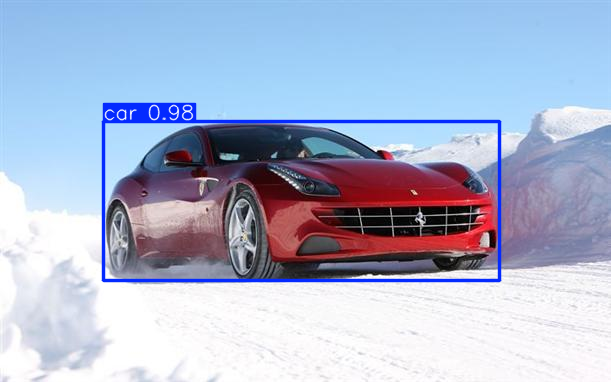

In [41]:
# Assuming 'results' is a list containing a single Results object:
results[0].show()